# Loan Eligibility Prediction

In [1]:
# importing the required libraries

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading the data

train_data = pd.read_csv('Loan_data/loan-train.csv')
test_data = pd.read_csv('Loan_data/loan-test.csv')

train_data.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [3]:
train_data.sample(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
438,LP002403,Male,No,0,Graduate,Yes,10416,0.0,187.0,360.0,0.0,Urban,N
384,LP002236,Male,Yes,2,Graduate,No,4566,0.0,100.0,360.0,1.0,Urban,N
40,LP001119,Male,No,0,Graduate,No,3600,0.0,80.0,360.0,1.0,Urban,N
55,LP001194,Male,Yes,2,Graduate,No,2708,1167.0,97.0,360.0,1.0,Semiurban,Y
185,LP001640,Male,Yes,0,Graduate,Yes,39147,4750.0,120.0,360.0,1.0,Semiurban,Y
302,LP001974,Female,No,0,Graduate,No,5000,0.0,132.0,360.0,1.0,Rural,Y
274,LP001896,Male,Yes,2,Graduate,No,3900,0.0,90.0,360.0,1.0,Semiurban,Y
292,LP001940,Male,Yes,2,Graduate,No,3153,1560.0,134.0,360.0,1.0,Urban,Y
505,LP002622,Male,Yes,2,Graduate,No,3510,4416.0,243.0,360.0,1.0,Rural,Y
569,LP002841,Male,Yes,0,Graduate,No,3166,2064.0,104.0,360.0,0.0,Urban,N


In [4]:
train_data.shape

(614, 13)

In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


### Data Cleaning

#### 1. Checking for Completeness

In [6]:
# 1. Checking for missing values in the dataset
train_data.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

The dataset has missing values

In [7]:
# Dealing with missing values
def missing_values(data):
    for i in data.columns:
        if data[i].dtype == 'object':
            data[i] = data[i].fillna('Missing')
        else:
            if data[i].dtype == 'int64' or data[i].dtype == 'float64':
                data[i] = data[i].fillna(data[i].mean())
    return data

train_data = missing_values(train_data)

train_data.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

#### 2. Checking for Consistency

In [8]:
# 2. Checking for duplicate values in the dataset
train_data.duplicated().sum()

0

The dataset has no duplicated values

#### 3. Checking for Uniformity

In [9]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


#### 4. Checking for Validity

In [10]:
# 3. Checking for outliers in the dataset

train_data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,146.412162,342.000000,0.842199
std,6109.041673,2926.248369,84.037468,64.372489,0.349681
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,129.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


<Axes: >

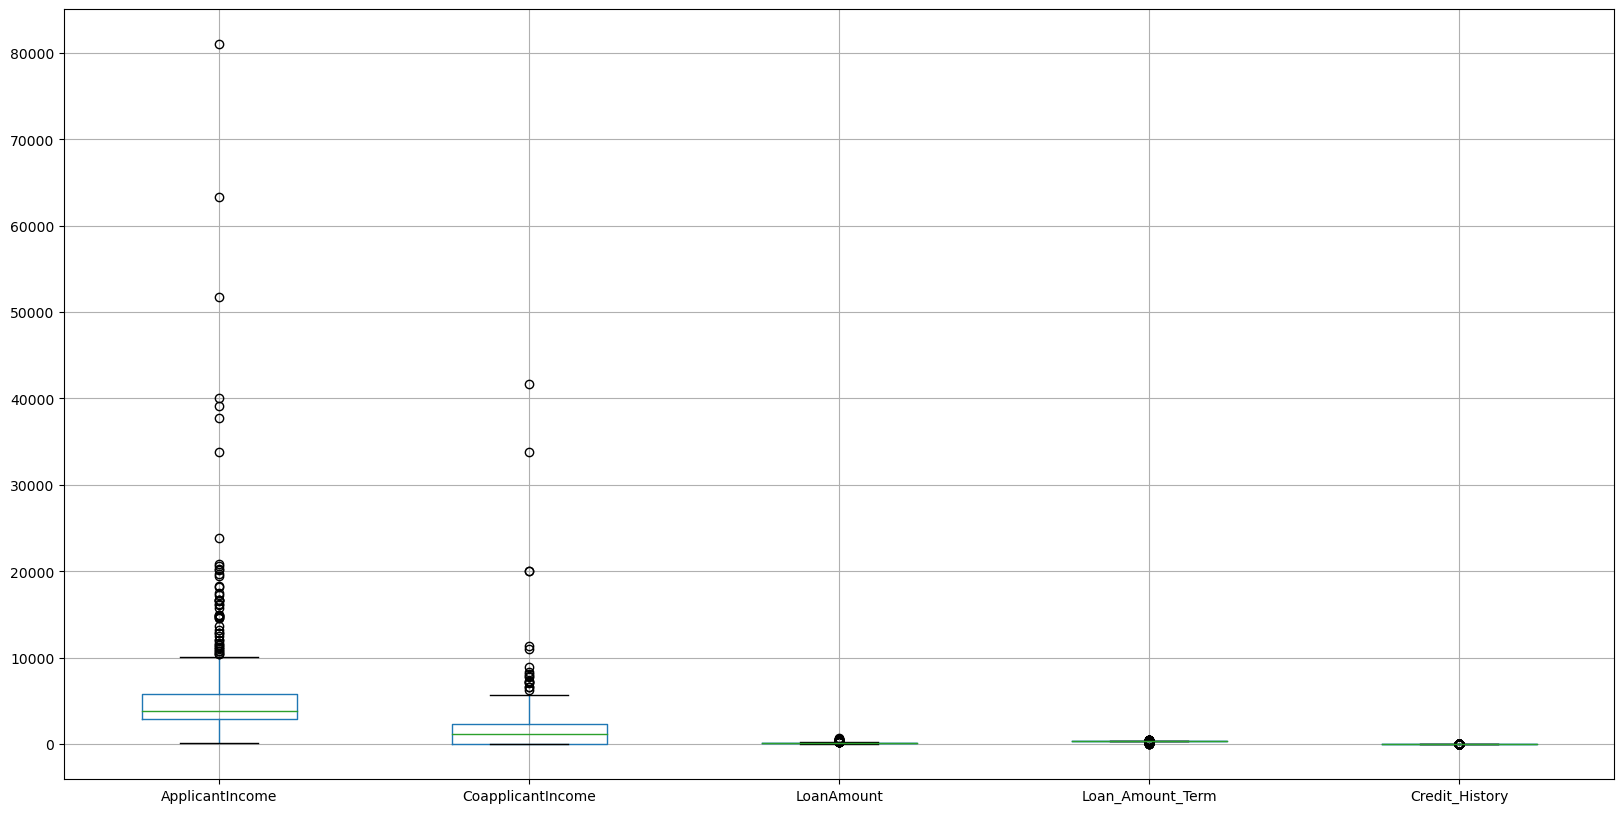

In [11]:
train_data.boxplot(figsize=(20,10))

In [12]:
# Dealing with outliers
def check_for_outlier(df,col):
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
    df = df[(df[col] > lower_bound) & (df[col] < upper_bound)]
    return df

In [13]:
check_for_outlier(train_data,'ApplicantIncome')
check_for_outlier(train_data,'CoapplicantIncome')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.000000,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.000000,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.000000,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.000000,360.0,1.0,Urban,Y


### Exploratory Data Analysis

In [17]:
sns.set_style('whitegrid')

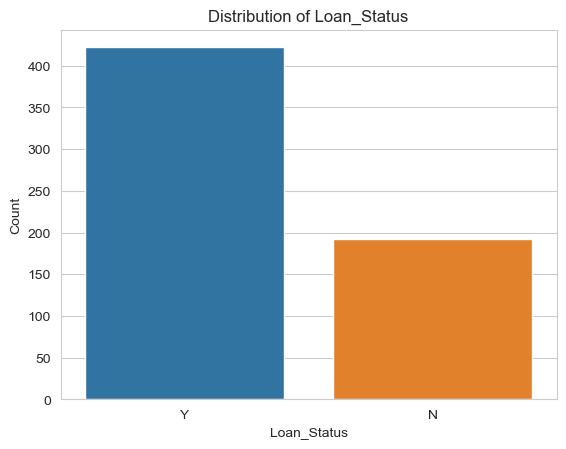

In [21]:
# plotting the distribution of the target variable
sns.countplot(x = train_data['Loan_Status'])
plt.title('Distribution of Loan_Status')
plt.ylabel('Count')
plt.xlabel('Loan_Status')
plt.show()

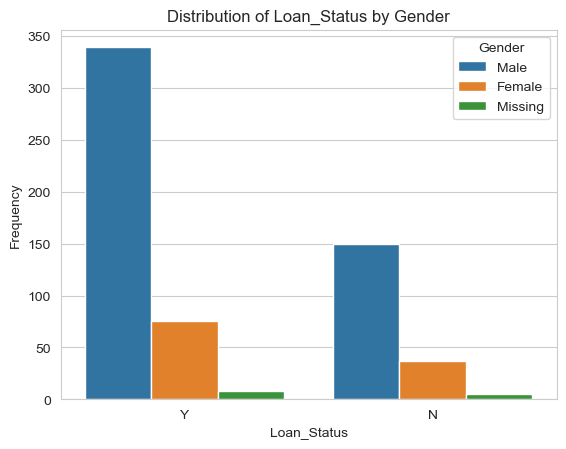

In [26]:
# Distribution of Loan_Status by Gender
sns.countplot(x = train_data['Loan_Status'], hue = train_data['Gender'])
plt.title('Distribution of Loan_Status by Gender')
plt.ylabel('Frequency')
plt.xlabel('Loan_Status')
plt.show()

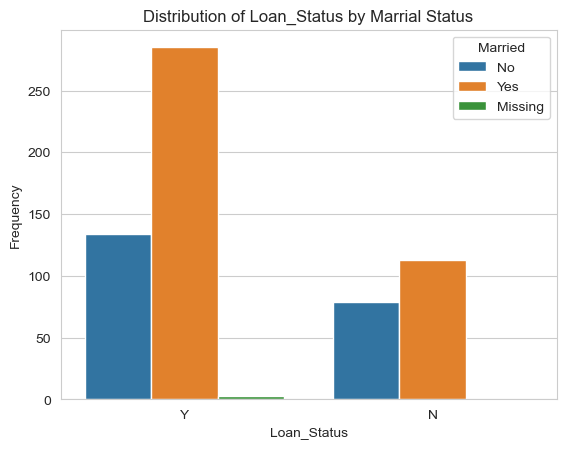

In [27]:
# distribution of Loan_Status by Married
sns.countplot(x = train_data['Loan_Status'], hue = train_data['Married'])
plt.title('Distribution of Loan_Status by Marrial Status')
plt.ylabel('Frequency')
plt.xlabel('Loan_Status')
plt.show()

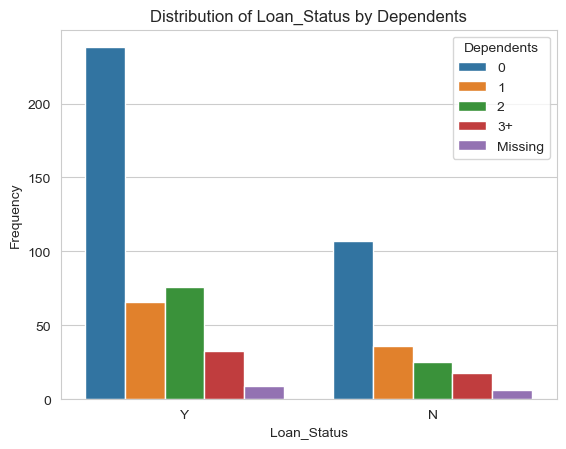

In [29]:
# Distribution of Loan_Status by Dependents
sns.countplot(x = train_data['Loan_Status'], hue = train_data['Dependents'])
plt.title('Distribution of Loan_Status by Dependents')
plt.ylabel('Frequency')
plt.xlabel('Loan_Status')
plt.show()

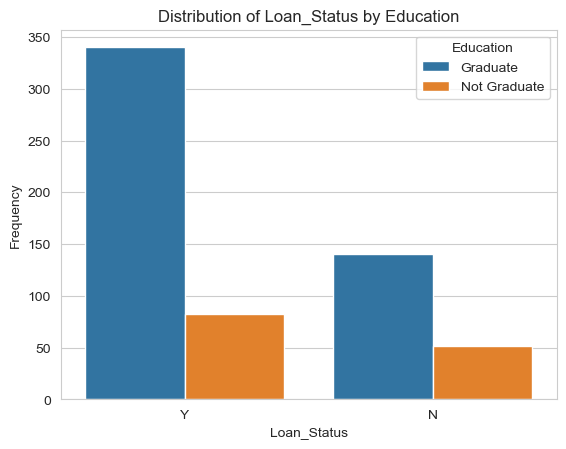

In [30]:
# distribution of Loan_Status by Education
sns.countplot(x = train_data['Loan_Status'], hue = train_data['Education'])
plt.title('Distribution of Loan_Status by Education')
plt.ylabel('Frequency')
plt.xlabel('Loan_Status')
plt.show()

In [32]:
train_data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

#### Multivariate Analysis

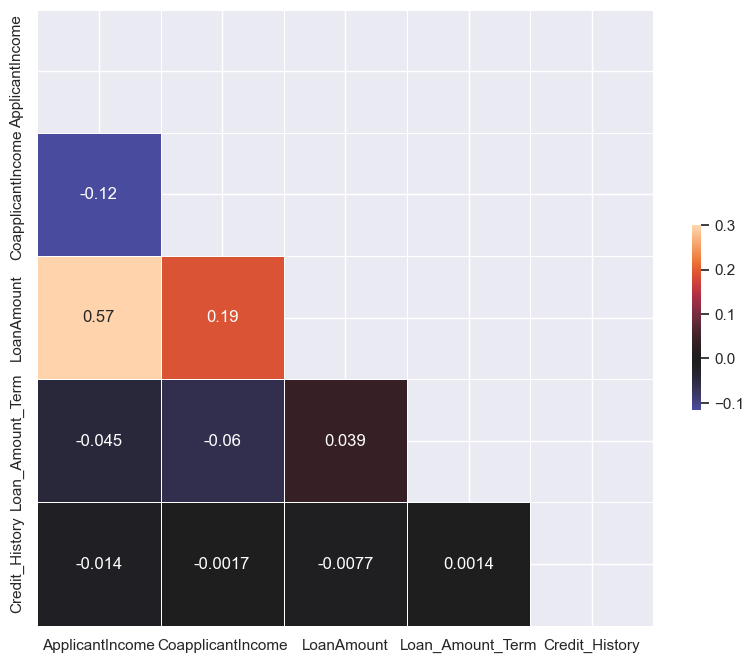

In [39]:
sns.set(style="darkgrid")

corr = train_data.corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

vf, ax = plt.subplots(figsize=(10, 8))

sns.heatmap(corr, mask=mask, vmax=.3, center=0,annot=True,
            square=True, linewidths=.5, cbar_kws={"shrink": .3})

plt.show()

### Data Preparation

In [43]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [44]:
train_data.drop(['Loan_ID'], axis = 1, inplace = True)

In [45]:
# encoding the categorical variables
from sklearn.preprocessing import LabelEncoder

# creating an object of the LabelEncoder
le = LabelEncoder()

def encoding_categorical(data):
    if data.dtype == 'object':
        data = le.fit_transform(data)
    return data 

In [46]:
train_data = train_data.apply(encoding_categorical)
train_data.info()

In [49]:
# scaling the data
from sklearn.preprocessing import StandardScaler

# creating an object of the StandardScaler
scaler = StandardScaler()

# creating a list of numerical variables
num_vars = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']

# scaling the numerical variables
train_data[num_vars] = scaler.fit_transform(train_data[num_vars])

train_data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,1,0,0,1,0.072991,-0.554487,0.000000,0.279851,1.0,2,1
1,1,2,1,0,1,-0.134412,-0.038732,-0.219273,0.279851,1.0,0,0
2,1,2,0,0,2,-0.393747,-0.554487,-0.957641,0.279851,1.0,2,1
3,1,2,0,1,1,-0.462062,0.251980,-0.314547,0.279851,1.0,2,1
4,1,1,0,0,1,0.097728,-0.554487,-0.064454,0.279851,1.0,2,1


In [50]:
# splitting the data into train and test set
from sklearn.model_selection import train_test_split

X = train_data.drop(['Loan_Status'], axis=1)
y = train_data['Loan_Status']

# splitting the data into 80% training and 20% testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=123)

# checking the shapes
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(491, 11)
(491,)
(123, 11)
(123,)


### Model Building

In [69]:
# importing the required libraries
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

##### 1. Baseline Model

In [70]:
def fit_and_evaluate(model):
    # fit the model
    model.fit(X_train, y_train)
    # predict the values
    y_pred = model.predict(X_test)
    # evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    confusion = confusion_matrix(y_test, y_pred)
    classification = classification_report(y_test, y_pred)
    # return the values
    return print('Accuracy: ',accuracy,'\n\n',
    'Confusion Matrix: \n [[TP , FP] \n [FN , TN]]\n\n',
    confusion,'\n\n','Classification Report:',classification)


In [71]:
logreg_model = LogisticRegression(random_state=123, solver='liblinear', penalty='l2')

fit_and_evaluate(logreg_model)

Accuracy:  0.7804878048780488 

 Confusion Matrix: 
 [[TP , FP] 
 [FN , TN]]

 [[17 25]
 [ 2 79]] 

 Classification Report:               precision    recall  f1-score   support

           0       0.89      0.40      0.56        42
           1       0.76      0.98      0.85        81

    accuracy                           0.78       123
   macro avg       0.83      0.69      0.71       123
weighted avg       0.81      0.78      0.75       123



#### 2. Decision Trees Model

In [72]:
#### 2. Decision Tree Classifier

dtree_model = DecisionTreeClassifier(random_state=123)

fit_and_evaluate(dtree_model)

Accuracy:  0.7154471544715447 

 Confusion Matrix: 
 [[TP , FP] 
 [FN , TN]]

 [[24 18]
 [17 64]] 

 Classification Report:               precision    recall  f1-score   support

           0       0.59      0.57      0.58        42
           1       0.78      0.79      0.79        81

    accuracy                           0.72       123
   macro avg       0.68      0.68      0.68       123
weighted avg       0.71      0.72      0.71       123



In [73]:
# tuning the decision tree classifier
params = {'criterion':['gini','entropy'],
            'max_depth':[2,3,4,5,6,7,8,9,10],
            'min_samples_leaf':[1,2,3,4,5,6,7,8,9,10],
            'min_samples_split':[2,3,4,5,6,7,8,9,10],
            'splitter':['best','random']}

grid_search = GridSearchCV(estimator=dtree_model, param_grid=params, cv=5, n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

print(grid_search.best_params_)

Fitting 5 folds for each of 3240 candidates, totalling 16200 fits


{'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 2, 'min_samples_split': 2, 'splitter': 'best'}


In [75]:
# tuned decision tree model
dtree_tuned_model = DecisionTreeClassifier(criterion='gini', max_depth=2, min_samples_leaf=2,
                          min_samples_split=2, random_state=123, splitter='best')

fit_and_evaluate(dtree_model)

Accuracy:  0.7154471544715447 

 Confusion Matrix: 
 [[TP , FP] 
 [FN , TN]]

 [[24 18]
 [17 64]] 

 Classification Report:               precision    recall  f1-score   support

           0       0.59      0.57      0.58        42
           1       0.78      0.79      0.79        81

    accuracy                           0.72       123
   macro avg       0.68      0.68      0.68       123
weighted avg       0.71      0.72      0.71       123



#### 3. Random Forest Model

In [76]:
#### 3. Random Forest Classifier

forest_model = RandomForestClassifier(random_state=123)

fit_and_evaluate(forest_model)

Accuracy:  0.7804878048780488 

 Confusion Matrix: 
 [[TP , FP] 
 [FN , TN]]

 [[19 23]
 [ 4 77]] 

 Classification Report:               precision    recall  f1-score   support

           0       0.83      0.45      0.58        42
           1       0.77      0.95      0.85        81

    accuracy                           0.78       123
   macro avg       0.80      0.70      0.72       123
weighted avg       0.79      0.78      0.76       123



In [77]:
# tuning the random forest classifier
from sklearn.model_selection import GridSearchCV

forest_params = {
    "n_estimators": [200, 400, 600, 800, 1000],
    "max_features": ['auto', 'sqrt'],
    "max_depth": [10, 20, 30, 40, 50, 60],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
}

forest_cv = GridSearchCV(estimator=forest_model, param_grid=forest_params, cv=5)
forest_cv.fit(X_train, y_train)

print(forest_cv.best_params_)

In [ ]:
# tuned random forest model
forest_tuned_model = RandomForestClassifier(n_estimators=1000, min_samples_split=5, min_samples_leaf=1, 
                                            max_features='auto', max_depth=70, bootstrap=True)
fit_and_evaluate(forest_tuned_model)

In [ ]:
# saving the best model
import pickle

# open a file, where you want to store the data
file = open('loan_prediction_model.pkl', 'wb')

# dump information to that file
pickle.dump(forest_tuned_model, file)

# close the file
file.close()

### Model Evaluation

In [ ]:
# loading the test data
test_data = pd.read_csv('Loan_data\loan-test.csv')

In [ ]:
# fuction to preprocess the data
def preprocess_data(data):
    # dropping the Loan_ID column
    data.drop(['Loan_ID'], axis = 1, inplace = True)
    # encoding the categorical variables
    data = data.apply(encoding_categorical)
    # scaling the data
    data[num_vars] = scaler.transform(data[num_vars])
    return data

# preprocessing the test data
test_data = preprocess_data(test_data)

# predicting the values
y_pred = forest_tuned_model.predict(test_data)